 # Quelle langue parlent les protéines ?
----------------------------------------------------------------
----------------------------------------------------------------

## Objectif :
----------------
1. Générer les dictionnaires de plusieurs langues (à partir des livres du projet Gutenberg)
2. Mettre en forme les séquences des protéines ( .fasta de uniprot)
3. Identifier le maximum de mots différents pour chaque langue / Conclure 
4. Visualisation nuages de mots


## Etape 1 : Générer des dictionnaires

In [1]:
import nltk # text mining
import re # regex
import chardet # détection encodage
import unicodedata # conversion à partir unicode


def tokenize_only(text):
    """
    Extrait une liste de mots d'un texte
    Ne conserve que les mots composés uniquement de lettres codantes 
    Retourne une liste
    """
    # genere une liste de mots à partir d'un texte
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # elimine la ponctuation, les caractères numériques ...
    for token in tokens:
        token = re.sub(r'[-_.\']', '', token)

        # seules les lettres ["a","c","d","e","f","g","h","i","k","l","m","n","p","q","r","s","t","v","w","y",] sont codantes 
        # (20 acides aminés)
        #Donc on peut éliminer du dictionnaire les mots contenant une des 6 lettres restantes ["b","j","o","u","x","z"]
        m = re.search('[a-zA-Z]', token)
        p = re.match(r"[bjouxz]", token)
        q = re.search('[0-9]', token)
        if m and not p and not q:
            filtered_tokens.append(token)
            
    # On retire les mots de - de 3 lettres
    filtered_tokens = [item for item in filtered_tokens if len(item)>2]        
    
    return filtered_tokens



#Fonction de nettoyage 
def clean(line):
    """
    Retire les accents 
    Retourne la ligne en minuscules 
    """

    # élimine les accents, passe en minuscule
    try :
        # détecte l'encodage de la ligne
        encoding =  chardet.detect(line)
        line = unicodedata.normalize("NFKD", line.decode(encoding["encoding"])).encode("ASCII", 'ignore').lower()
    except :
        try :
            line = line.encode("ASCII", 'ignore').lower()
        except :
            pass
    return line

###  De nombreux livres du domaine public sont disponibles sur project [Guntenberg](https://www.gutenberg.org/catalog/).
* soit télécharger des livres puis les importer au format texte 
* soit utiliser les textes disponibles via nltk


In [2]:
from nltk.corpus import gutenberg

La plupart des textes sont en anglais

In [3]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

La déclaration universelle des droits de l'homme est traduite dans plus de 300 langues

In [4]:
from nltk.corpus import udhr

In [5]:
nltk.corpus.udhr.fileids()[10:20]

['Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amharic-Afenegus6..60375',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Armenian-DallakHelv',
 'Asante-UTF8',
 'Ashaninca-Latin1']

In [6]:
declaration =""
for word in nltk.corpus.udhr.words('French_Francais-Latin1'):
    declaration += word+" " 
print declaration[:1002]

Déclaration universelle des droits de l ' homme Préambule Considérant que la reconnaissance de la dignité inhérente à tous les membres de la famille humaine et de leurs droits égaux et inaliénables constitue le fondement de la liberté , de la justice et de la paix dans le monde , Considérant que la méconnaissance et le mépris des droits de l ' homme ont conduit à des actes de barbarie qui révoltent la conscience de l ' humanité et que l ' avènement d ' un monde où les êtres humains seront libres de parler et de croire , libérés de la terreur et de la misère , a été proclamé comme la plus haute aspiration de l ' homme , Considérant qu ' il est essentiel que les droits de l ' homme soient protégés par un régime de droit pour que l ' homme ne soit pas contraint , en suprême recours , à la révolte contre la tyrannie et l ' oppression , Considérant qu ' il est essentiel d ' encourager le développement de relations amicales entre nations , Considérant que dans la Charte les peuples des Natio

> Plus de 300 langues différentes => Filtres des langues utilisables.


In [7]:
dicos = []
errorLangages = []
for langage in nltk.corpus.udhr.fileids() :
    try :
        dico = set(tokenize_only(clean((" ").join((nltk.corpus.udhr.words(langage))))))
        if len(dico)>50 :
            dicos.append(dico)
        else :
            errorLangages.append(langage)
            
    except :
#        print "encoding error for langage "+ langage
        errorLangages.append(langage)

langages = [lang for lang in nltk.corpus.udhr.fileids() if lang not in errorLangages]

In [8]:
dicoLengths = [len(dico) for dico in dicos]
minDicoLength, maxDicoLength  = min(dicoLengths),  max(dicoLengths)

print str(len(dicoLengths)) + " dictionnaires restants :\n" 
for i in range(len(dicos)) :
    if len(dicos[i]) == minDicoLength : 
        print "    * minSize :" + str(len(dicos[i])) + " different words in " + langages[i] + " dictionary."
    if len(dicos[i]) == maxDicoLength : 
        print "    * maxSize :" + str(len(dicos[i])) + " different words in " + langages[i] + " dictionary."    



282 dictionnaires restants :

    * maxSize :644 different words in Latin_Latina-v2-Latin1 dictionary.
    * minSize :56 different words in Macedonian-UTF8 dictionary.


In [9]:
# Reordonne les listes en fonction de la taille du dictionnaire

langages = [x for (y,x) in sorted(zip(dicoLengths,langages), reverse=True)]
dicos = [x for (y,x) in sorted(zip(dicoLengths,dicos), reverse=True)]
dicoLengths = [y for (y,x) in sorted(zip(dicoLengths,dicos), reverse=True)]


for i in range(10) :
    print str(dicoLengths[i]) + " differents words in " + langages[i] + " dictionary."



644 differents words in Latin_Latina-v2-Latin1 dictionary.
615 differents words in Latin_Latina-Latin1 dictionary.
598 differents words in Siswati-Latin1 dictionary.
590 differents words in Estonian_Eesti-Latin1 dictionary.
579 differents words in Lithuanian_Lietuviskai-Baltic dictionary.
574 differents words in Turkish_Turkce-Turkish dictionary.
562 differents words in Latvian-Latin1 dictionary.
558 differents words in Shona-Latin1 dictionary.
558 differents words in Finnish_Suomi-Latin1 dictionary.
542 differents words in Turkish_Turkce-UTF8 dictionary.


## Etape 2 : les séquences des protéines

### Format : un en-tête suivi d'une séquence d'acides aminés

In [10]:
# Fichier de test
protFilename = "C:/Users/thaunayf/Documents/Formation_Python/DataChallenge5/miniProt.fasta"

i=0
with open(protFilename) as f:
    for line in f:
        if i in range(5):
            print line
            i += 1

>sp|P27361|MK03_HUMAN Mitogen-activated protein kinase 3 OS=Homo sapiens GN=MAPK3 PE=1 SV=4

MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAY

DHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYI

VQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDL

KICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLS



Il existe des modules (Bio, Biopython ...) pour parser les fichiers .fasta


In [11]:
def importSeqProt(filename):
    """
    importe le fichier
    sépare les headers et les séquences d'acides aminés
    renvoie un tuple    
    """
    with open(protFilename) as f:
        seq, seqs, headers = [], [], []
        header = True
        for line in f.readlines():
            line = re.sub('\n', '', line)
            if line.startswith(">sp"):
                # header : à parser
                header = True
                headers.append(line)
            else :
                if header and seq : 
                    chain = "".join(seq)
                    seqs.append(chain)
                    seq[:] = []
                    seq.append(line)
                    # nouvelle sequence
                else :
                    # on continue la séquence précédente
                    seq.append(line)
                header = False     
        chain = "".join(seq)     
        seqs.append(chain)
    return headers, seqs
                
                


In [12]:
protFilename = "C:/Users/thaunayf/Documents/Formation_Python/DataChallenge5/miniProt.fasta"
headers, seqs = importSeqProt(protFilename)

print headers

['>sp|P27361|MK03_HUMAN Mitogen-activated protein kinase 3 OS=Homo sapiens GN=MAPK3 PE=1 SV=4', '>sp|P27361-2|MK03_HUMAN Isoform 2 of Mitogen-activated protein kinase 3 OS=Homo sapiens GN=MAPK3', '>sp|P27361-3|MK03_HUMAN Isoform 3 of Mitogen-activated protein kinase 3 OS=Homo sapiens GN=MAPK3', '>sp|P53779|MK10_HUMAN Mitogen-activated protein kinase 10 OS=Homo sapiens GN=MAPK10 PE=1 SV=2']


In [13]:
print seqs

['MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP', 'MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP', 'MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMK

In [14]:
# Parser les headers

def parserHeaders(headers):
    code = []
    proteineName = []
    os = []
    gn = []
    pe = []
    sv = []

    for header in headers:
        h = header.split('|')
        code.append(h[1])
        i = h[2].split('OS=')
        proteineName.append(i[0])
        if len(i)>1:
            j = i[1].split('GN=')
            os.append(j[0])
            if len(j)>1:
                k = j[1].split('PE=')
                gn.append(k[0])
                if len(k)>1:
                    l = k[1].split('SV=')
                    pe.append(l[0])
                    sv.append(l[1])   
                else :
                    pe.append(0)
                    sv.append(0)
            else :
                gn.append(0); pe.append(0); sv.append(0)
        else :
            os.append(0); gn.append(0); pe.append(0); sv.append(0)
                
    return code, proteineName, os, gn, pe, sv 
    

### Séquences dans une DataFrame

In [15]:
import pandas as pd
data = pd.DataFrame()

code, proteineName, os, gn, pe, sv  = parserHeaders(headers)

data["code"] = code
data["proteineName"] = proteineName
data["os"] = os
data["gn"] = gn
data["pe"] = pe
data["sv"] = sv
data["sequence"] = seqs

In [16]:
data.head()

,code,proteineName,os,gn,pe,sv,sequence
0,P27361,MK03_HUMAN Mitogen-activated protein kinase 3,Homo sapiens,MAPK3,1,4,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
1,P27361-2,MK03_HUMAN Isoform 2 of Mitogen-activated prot...,Homo sapiens,MAPK3,0,0,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
2,P27361-3,MK03_HUMAN Isoform 3 of Mitogen-activated prot...,Homo sapiens,MAPK3,0,0,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
3,P53779,MK10_HUMAN Mitogen-activated protein kinase 10,Homo sapiens,MAPK10,1,2,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDN...


### Pour le fichier complet

In [17]:
protFilename = "C:/Users/thaunayf/Documents/Formation_Python/DataChallenge5/uniprot-proteome%3AUP000005640.fasta"

headers, seqs = importSeqProt(protFilename)
              

In [18]:
data = pd.DataFrame()

code, proteineName, os, gn, pe, sv  = parserHeaders(headers)

data["code"] = code
data["proteineName"] = proteineName
data["os"] = os
data["gn"] = gn
data["pe"] = pe
data["sv"] = sv
data["sequence"] = seqs

data.head()

,code,proteineName,os,gn,pe,sv,sequence
0,P27361,MK03_HUMAN Mitogen-activated protein kinase 3,Homo sapiens,MAPK3,1,4,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
1,P27361-2,MK03_HUMAN Isoform 2 of Mitogen-activated prot...,Homo sapiens,MAPK3,0,0,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
2,P27361-3,MK03_HUMAN Isoform 3 of Mitogen-activated prot...,Homo sapiens,MAPK3,0,0,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...
3,P53779,MK10_HUMAN Mitogen-activated protein kinase 10,Homo sapiens,MAPK10,1,2,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDN...
4,P53779-2,MK10_HUMAN Isoform Alpha-1 of Mitogen-activate...,Homo sapiens,MAPK10,0,0,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDN...


In [19]:
print "Nb de lignes: " + str(len(data))

Nb de lignes: 42098


## Etape 3: Identification des mots de chaque langue

In [20]:
# Besoin d'optimisation de la recherche d'un mot dans une string
# Le module esmre a une très grande scalabilité 
import esm

totalWords = []

print "Dans l'ensemble des séquences de protéines, on dénombre :"  
for i in range(len(dicos)):
    # Creer et remplir l'index
    index = esm.Index()
    try :
        for word in dicos[i]:
            index.enter(word)
        index.fix()

        words = []
        for sequence in data.sequence:
            words.extend(index.query(sequence))
            # esmre fournit une liste de tuple(indexDebut,indexFin), motTrouvé 
            words = list(set([item[1] for item in words]))  
    #        words = [word for word in dictionaries[i] if word in sequence]
        totalWords.append(words)
        print "        *"+str(len(set(totalWords[i]))) +" mots "+langages[i]+ " différents"  
    except : 
        print "caracteres non décodes langage "+ langages[i]
        
    


Dans l'ensemble des séquences de protéines, on dénombre :
        *49 mots Latin_Latina-v2-Latin1 différents
        *53 mots Latin_Latina-Latin1 différents
        *10 mots Siswati-Latin1 différents
        *20 mots Estonian_Eesti-Latin1 différents
        *24 mots Lithuanian_Lietuviskai-Baltic différents
        *23 mots Turkish_Turkce-Turkish différents
        *23 mots Latvian-Latin1 différents
        *13 mots Shona-Latin1 différents
        *16 mots Finnish_Suomi-Latin1 différents
        *26 mots Turkish_Turkce-UTF8 différents
        *25 mots Mikmaq_Micmac-Mikmaq-Latin1 différents
        *40 mots Icelandic_Yslenska-Latin1 différents
        *17 mots Aguaruna-Latin1 différents
        *35 mots Esperanto-T61 différents
        *60 mots Sorbian-Latin2 différents
        *34 mots Faroese-Latin1 différents
        *38 mots Slovenian_Slovenscina-Latin2 différents
        *51 mots Esperanto-UTF8 différents
        *6 mots Zulu-Latin1 différents
        *15 mots Hungarian_Magyar-Latin

In [21]:
wordsInProt = [len(words) for words in totalWords]
maxWordsInProt  = max(wordsInProt)
print "Le nombre max de mots : " + str(maxWordsInProt)

Le nombre max de mots : 92


In [22]:
# Reordonne les listes en en fonction du nombre max de mots
langages = [x for (y,x) in sorted(zip(wordsInProt,langages), reverse=True)]
totalWords = [x for (y,x) in sorted(zip(wordsInProt,totalWords), reverse=True)]
wordsInProt = [y for (y,x) in sorted(zip(wordsInProt,langages), reverse =True)]

In [23]:
for i in range(5):
    print langages[i] + " : "+ str(wordsInProt[i]) + " mots différents"

TokPisin-Latin1 : 92 mots différents
Mende-UTF8 : 81 mots différents
Rarotongan_MaoriCookIslands-Latin1 : 69 mots différents
Czech-UTF8 : 64 mots différents
Sorbian-Latin2 : 60 mots différents


### Comme attendu, la langue parlée par les protéines est le "tok pisin", ou néo-mélanésien,  un créole à base lexicale anglaise ...

In [24]:
longestWords = []
maxLength = 0
for lang in totalWords:
    lengths = [ len(word) for word in lang]
    maxLength = max(maxLength,max(lengths))
    longestWord = [word for word in lang if len(word) == max(lengths)]
    longestWords.append(longestWord)
    
    
for i in range(len(longestWords)):
    for word in longestWords[i] :
        if len(word) == maxLength :
            print "Le mot le plus long est " + word + " ("+str(maxLength)+" lettres)"+ ", en langage " + langages[i] 

Le mot le plus long est determination (13 lettres), en langage Mende-UTF8
Le mot le plus long est determination (13 lettres), en langage Czech-Latin2-err


La base lexicale anglaise est bien représentée et les corpus faciles d'accès. En se basant sur l'Anglais ...

## Etape 4:  Visualisation 


Quelques uns des textes les plus connus de la littérature - en Anglais

In [25]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [26]:
corpus =[]
for name in gutenberg.fileids():
    corpus.extend(nltk.corpus.gutenberg.words(name))

print len(corpus)

2621613


In [27]:
# Pas de racination pour rendre plus joli le nuage de mots
dico = list(set(tokenize_only(clean((" ").join(corpus)))))

In [28]:
totalWords = []

print "Dans l'ensemble des séquences de protéines, on dénombre :"  
index = esm.Index()
for word in dico:
    index.enter(word)
index.fix()

words = []
for sequence in data.sequence:
    words.extend(index.query(sequence))
    words = list(set([item[1] for item in words]))  
    totalWords.extend(words)

    
print str(len(totalWords)) + " mots distincts en Anglais."   


Dans l'ensemble des séquences de protéines, on dénombre :
1742 mots distincts en Anglais.


### Nuages de mots

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(totalWords))


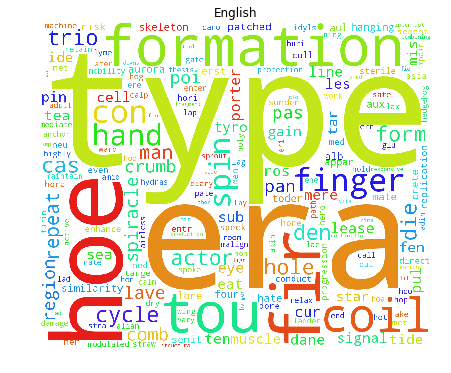

In [30]:
plt.figure(figsize=(8, 6))


# English
plt.title('English')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<tr>
    <th>[Wordsift](https://wordsift.org)</th>
    <th>[WordItOut](https://worditout.com/word-cloud/create)</th> 
    <th>[abcya](http://www.abcya.com/word_clouds.htm)</th>
</tr>
<tr>
    <td> <img src="files/wordShift.png" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="files/WordItout.png" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="files/abcya.png" alt="Drawing" style="width: 300px;"/> </td>
</tr>

